In [ ]:
#!pip install torch torchvision torchaudio ftfy regex tqdm
#!pip install git+https://github.com/openai/CLIP.git

In [2]:
import clip
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

100%|███████████████████████████████████████| 338M/338M [00:15<00:00, 22.2MiB/s]


In [37]:
image = preprocess(Image.open("/content/abol.jpeg")).unsqueeze(0).to(device)
labels = [
    "a tall tree with green leaves",
    "a stack of books on a shelf",
    "a beautiful natural landscape",
    "a modern sports car",
    "a potted house plant",
    "a wild animal in its habitat",
    "a company or brand logo"
]
text = clip.tokenize(labels).to(device)
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    logits_per_image, _ = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import clip # Import clip here

def display_classification_results(image_path, model, preprocess, device):
    """
    Loads, preprocesses, classifies, and displays the image and its CLIP classification probabilities.

    Args:
        image_path (str): The path to the image file.
        model: The loaded CLIP model.
        preprocess: The preprocessing function for the CLIP model.
        device: The device to run inference on (e.g., "cuda" or "cpu").
    """
    # Define the labels for classification
    labels = [
        "a tall tree with green leaves",
        "a stack of books on a shelf",
        "a beautiful natural landscape",
        "a modern sports car",
        "a potted house plant",
        "a wild animal in its habitat",
        "a company or brand logo"
    ]

    # Load and preprocess the image
    try:
        image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return
    except Exception as e:
        print(f"Error loading or preprocessing image {image_path}: {e}")
        return

    # Tokenize the text labels
    text = clip.tokenize(labels).to(device)

    # Perform classification
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)
        logits_per_image, _ = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    # Display the image
    try:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return
    except Exception as e:
        print(f"Error opening image {image_path}: {e}")
        return

    # Display labels with probabilities
    probs_dict = dict(zip(labels, probs[0]))

    print("Probabilidades:")
    for label, probability in probs_dict.items():
        print(f"{label}: {probability:.4f}")

    # Display most probable prediction
    predicted_label = labels[np.argmax(probs)]
    print(f"\nPredicción más probable: {predicted_label}")

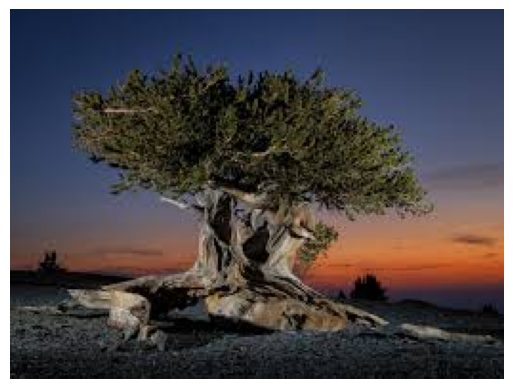

Probabilidades:
a tall tree with green leaves: 0.0687
a stack of books on a shelf: 0.0001
a beautiful natural landscape: 0.9250
a modern sports car: 0.0002
a potted house plant: 0.0024
a wild animal in its habitat: 0.0034
a company or brand logo: 0.0002

Predicción más probable: a beautiful natural landscape


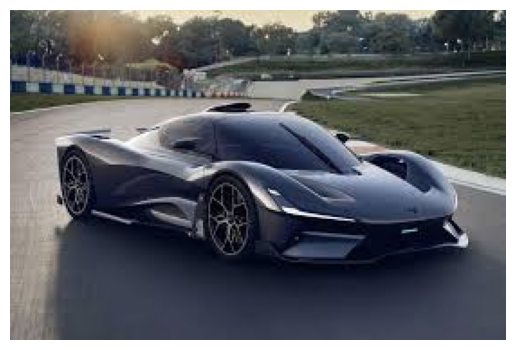

Probabilidades:
a tall tree with green leaves: 0.0000
a stack of books on a shelf: 0.0000
a beautiful natural landscape: 0.0001
a modern sports car: 0.9998
a potted house plant: 0.0000
a wild animal in its habitat: 0.0001
a company or brand logo: 0.0000

Predicción más probable: a modern sports car


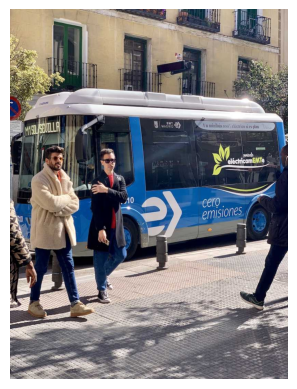

Probabilidades:
a tall tree with green leaves: 0.0012
a stack of books on a shelf: 0.0003
a beautiful natural landscape: 0.0036
a modern sports car: 0.4439
a potted house plant: 0.0058
a wild animal in its habitat: 0.1052
a company or brand logo: 0.4400

Predicción más probable: a modern sports car


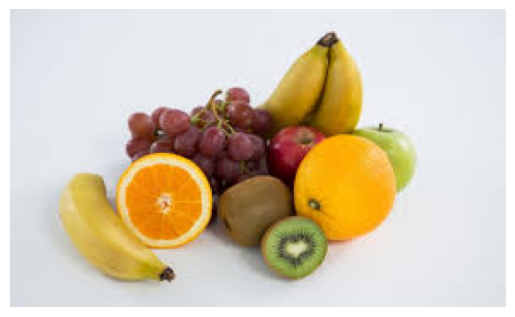

Probabilidades:
a tall tree with green leaves: 0.0037
a stack of books on a shelf: 0.0006
a beautiful natural landscape: 0.2526
a modern sports car: 0.0797
a potted house plant: 0.0329
a wild animal in its habitat: 0.0112
a company or brand logo: 0.6193

Predicción más probable: a company or brand logo


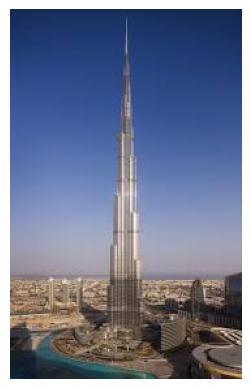

Probabilidades:
a tall tree with green leaves: 0.0380
a stack of books on a shelf: 0.0022
a beautiful natural landscape: 0.8178
a modern sports car: 0.0613
a potted house plant: 0.0012
a wild animal in its habitat: 0.0562
a company or brand logo: 0.0234

Predicción más probable: a beautiful natural landscape


In [42]:
display_classification_results("/content/abol.jpeg", model, preprocess, device)
display_classification_results("/content/car.jpeg", model, preprocess, device)
display_classification_results("/content/bus.jpg", model, preprocess, device)
display_classification_results("/content/descarga.jpeg", model, preprocess, device)
display_classification_results("/content/tower.jpeg", model, preprocess, device)